In [103]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import matplotlib.image as mpimg
import matplotlib

In [3]:
data = scio.loadmat("ex7data2.mat")
X = data['X']

In [4]:
def findClosestCentroids(X, centroids):
    m, n = X.shape
    idx = np.zeros(m)
    for i in range(X.shape[0]):
        tmp = X[i, :] - centroids[:,0].reshape(1, n)
        minJ = np.dot(tmp, tmp.T)
        for j in range(1, centroids.shape[1]):
            tmp = X[i, :] - centroids[:,j].reshape(1, n)
            tmpJ = np.dot(tmp, tmp.T)
            if tmpJ < minJ:
                minJ = tmpJ
                idx[i] = j
    return idx

In [5]:
initial_centroids = np.array([3, 6, 8, 3, 2, 5]).reshape(2, 3)
idx = findClosestCentroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [6]:
def computeCentroids(X, idx, K):
    n = X.shape[1]
    centroids = np.zeros((n, K))
    for i in range(K):
        centroids[:, i] = np.dot(X.T, idx == i) / np.sum(idx == i)
    return centroids

In [7]:
K = 3
centroids = computeCentroids(X, idx, K)
centroids

array([[2.42830111, 5.81350331, 7.11938687],
       [3.15792418, 2.63365645, 3.6166844 ]])

In [10]:
def runKMeans(X, init_centroids, max_iters):
    m = X.shape[0]
    idx = np.zeros(m)
    K = init_centroids.shape[1]
    centroids = init_centroids
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

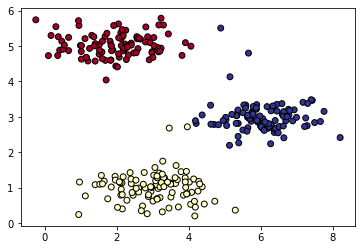

In [107]:
centroids, idx = runKMeans(X, initial_centroids, 10)
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(X[:, 0], X[:, 1], c = idx, s = 35, edgecolors = 'k', cmap = cm)

In [8]:
def kMeansInitCentroids(X, K):
    m = X.shape[0]
    random_indices = np.random.choice(np.arange(m), K)
    centroids = X[random_indices, :]
    return centroids.T

In [9]:
init_centroids = kMeansInitCentroids(X, K)
init_centroids

array([[2.14491101, 0.17783466, 2.11496411],
       [1.13582399, 5.29765032, 5.37373587]])

In [101]:
def imageCompression(path, K, max_iters):
    X = mpimg.imread(path)
    m, n, x = X.shape
    X = X.reshape(m * n, x)
    init_centroids = kMeansInitCentroids(X, K)
    centroids, idx = runKMeans(B, init_centroids, max_iters)
    idx = [int(i) for i in idx]
    X_com = centroids.T[idx]
    X_com = X_com.reshape(m, n, x)
    X = X.reshape(m, n, x)
    return X, X_com

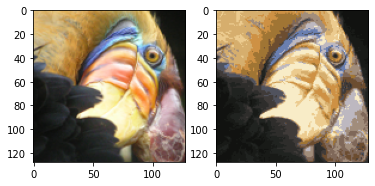

In [102]:
K = 16
max_iters = 10
path = "bird_small.png"
A, A_com = imageCompression(path, K, max_iters)
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.subplot(1, 2, 2)
plt.imshow(A_com)
plt.show()